In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

### Exploratory data quality report

In [2]:
df = pd.read_csv("concrete (1).csv")

In [3]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [4]:
df.isna().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [5]:
df.shape

(1030, 9)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a23a2e650>,
      dtype=object)

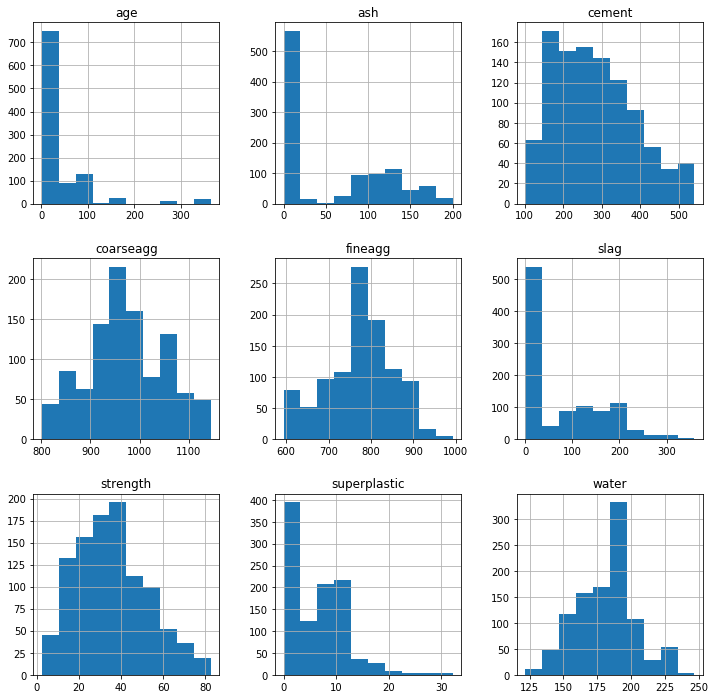

In [6]:
df.hist(figsize = (12, 12))

In [7]:
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [8]:
df.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


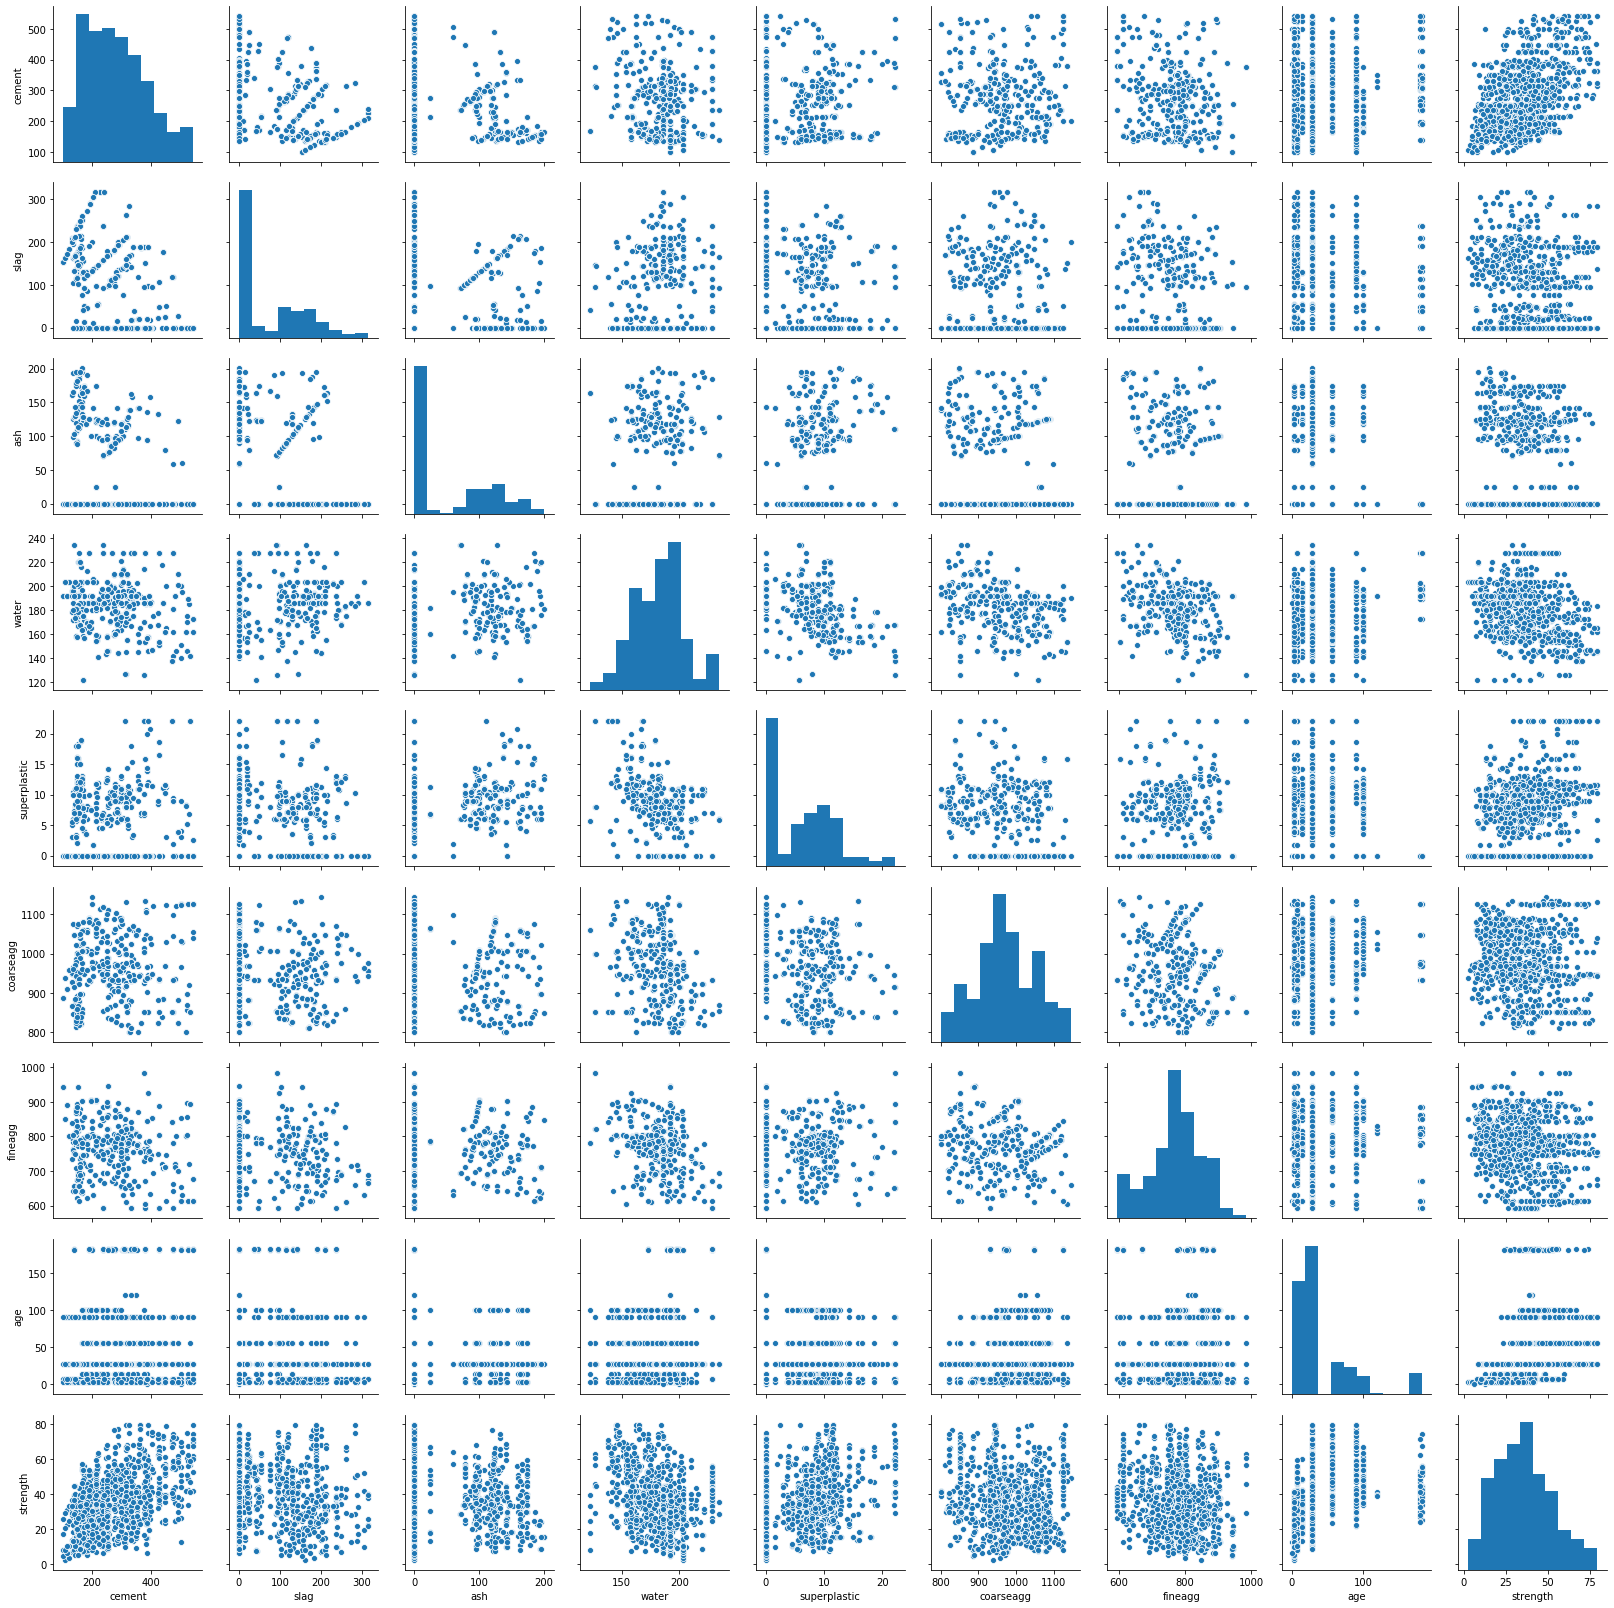

In [56]:
sns.pairplot(df)

In [10]:
columns = df.columns

In [11]:
df = pd.DataFrame(np.where(df > df.quantile(.75) + 2*df.std(), df.quantile(.75) + 2*df.std(), df))

In [12]:
df = pd.DataFrame(np.where(df < df.quantile(.25) - 2*df.std(), df.quantile(.25) - 2*df.std(), df))

In [13]:
df.columns = columns

### Feature Engineering techniques

In [14]:
from sklearn.model_selection import train_test_split
X = df.drop("strength", axis = 1)
Y = df["strength"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

In [31]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

feature_importance = regression_model.coef_
regression_model.score(X_train,y_train)

0.6841499248988079

In [32]:
regression_model.score(X_test,y_test)

0.6931733046238013

In [17]:
poly = PolynomialFeatures(3)
X_poly = poly.fit_transform(X)
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, Y, test_size=0.20, random_state=1)

In [29]:
regression_model = LinearRegression()
regression_model.fit(X_train_poly, y_train_poly)

regression_model.score(X_train_poly,y_train)

0.9410896504776509

In [30]:
regression_model.score(X_test_poly,y_test)

0.8985746253687588

### Creating the model and tuning it

Trying different polynomial features it was found that 3 gives leas mean sq error on test set. 

From linear regression model we got the coefficients which indicate the importance of features.

In [19]:
feature_importance = pd.DataFrame(np.absolute(feature_importance))
feature_importance.index = columns[:-1]
feature_importance.columns = ["Importance"]
feature_importance.sort_values(by="Importance", ascending = False)

,Importance
superplastic,0.358307
age,0.190358
cement,0.126982
water,0.117621
slag,0.113281
ash,0.093222
fineagg,0.033352
coarseagg,0.023918


In [41]:
svr = SVR()
params = {
    'kernel' : ['rbf'],
    'gamma' : [1e-06, 1e-05, 1e-04, 1e-03, 1e-02],
    'C' : [1, 10, 100, 1000, 10000]
}
grid = GridSearchCV(svr, params)
grid.fit(X_train,y_train)
grid.score(X_train, y_train)

/Users/sumeet/anaconda3/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.9168891560250061

In [42]:
grid.score(X_test, y_test)

0.8617182058136421

In [43]:
grid.best_estimator_

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1e-05,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Best performance remained that of a linear regressor with polynomial features. Tuning a SVR didn't outperform that.